# Pymaceuticals Inc.
---

### Analysis


Pymaceuticals Inc. conducted an animal study to explore potential treatments for squamous cell carcinoma (SCC), a type of skin cancer. Over the course of 45 days, 249 mice with SCC tumors were treated with various drug regimens. The primary objective of the study was to evaluate whether their drug, Capomulin, would outperform the other treatments. The key findings were as follows:

- Four drug regimens were tested: Capomulin, Ramicane, Infubinol, and Ceftamin. Capomulin and Ramicane demonstrated the most significant reduction in tumor volume. Both treatments showed similar statistical results, explaining why they were the top performers in the study.

- A strong positive correlation (0.84) was observed between mouse weight and average tumor volume, indicating that an increase in weight was associated with an increase in tumor size. The study also found that gender had no impact, as the distribution was equal between males and females, according to the pie chart.

- In reviewing the outliers, Infubinol had a potential outlier with a tumor volume of 36.32 mm³. This anomaly could suggest an unusual reaction to the treatment or a data collection error, warranting further investigation.

- The correlation and regression analysis for Capomulin revealed a positive relationship between mouse weight and tumor volume. The scatter plot indicated that changes in average tumor volume were mirrored by changes in mouse weight.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_csv = pd.merge(study_results, mouse_metadata, on= 'Mouse ID', how= 'left')

# Display the data table for preview
combine_csv.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = combine_csv["Mouse ID"].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combine_csv.loc[combine_csv.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = combine_csv.loc[combine_csv["Mouse ID"].isin(duplicate_mice)]
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_csv[combine_csv["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number = len(clean_df["Mouse ID"].unique())
clean_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_stats = clean_df.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
volume_mean = tumor_stats['Tumor Volume (mm3)'].mean()
volume_median = tumor_stats['Tumor Volume (mm3)'].median()
volume_variance = tumor_stats['Tumor Volume (mm3)'].var()
volume_standard_dev = tumor_stats['Tumor Volume (mm3)'].std()
volume_sem = tumor_stats['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame({"Mean Tumor Volume": volume_mean, 
                                "Median Tumor Volume":volume_median, 
                                "Tumor Volume Variance":volume_variance, 
                                "Tumor Volume Std. Dev.": volume_standard_dev, 
                                "Tumor Volume Std. Err.": volume_sem})
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_aggregation =  clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
tumor_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

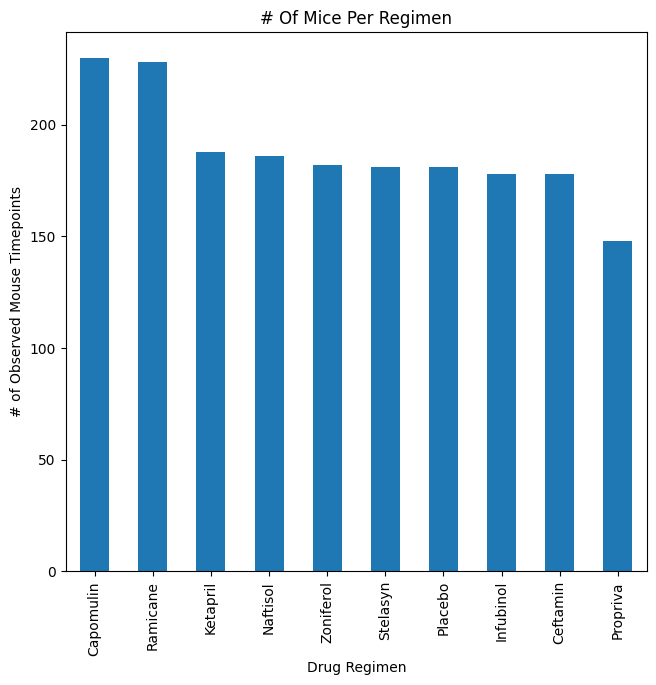

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df["Drug Regimen"].value_counts().plot(kind="bar", figsize = (7.5, 7))

drug_regimen.set_xlabel("Drug Regimen")
drug_regimen.set_ylabel("# of Observed Mouse Timepoints")
drug_regimen.set_title ("# Of Mice Per Regimen")

plt.show()

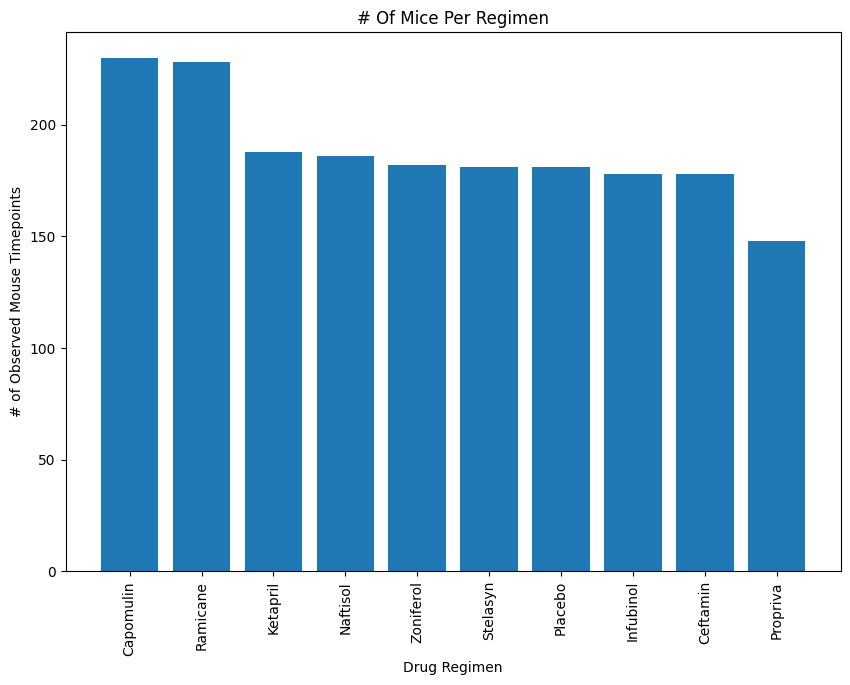

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = clean_df["Drug Regimen"].value_counts()

plt.figure(figsize= (10,7))
plt.bar (drug_regimen.index, drug_regimen.values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title ("# Of Mice Per Regimen")
plt.xticks(rotation="vertical")

plt.show()


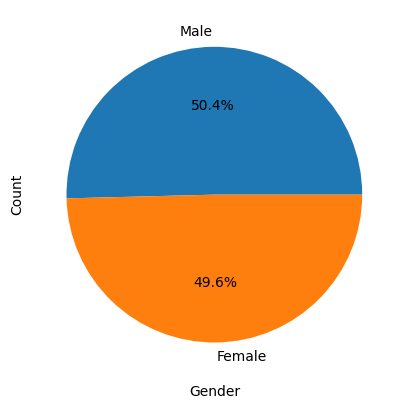

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_gender = clean_df.loc[:, ["Sex", "Mouse ID"]]

# Get the unique mice with their gender
unique_gender = unique_gender.drop_duplicates()
gender = unique_gender["Sex"].value_counts()

# Make the pie chart
pandas_pie = gender.plot(kind="pie", autopct="%1.1f%%", subplots=True)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

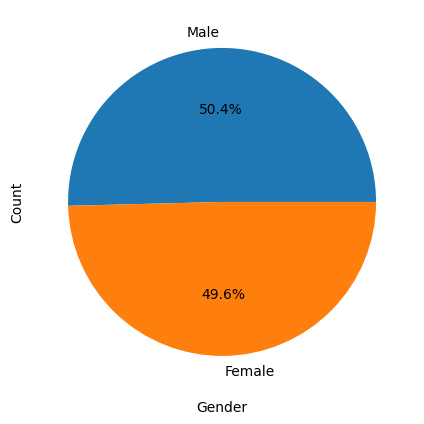

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_gender = clean_df.loc[:, ["Sex", "Mouse ID"]]

# Get the unique mice with their gender
unique_gender = unique_gender.drop_duplicates()
gender = unique_gender["Sex"].value_counts()


labels= ["Male", "Female"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.pie(gender, autopct="%1.1f%%", labels=labels)
plt.xlabel("Gender")
plt.ylabel("Count")

# Make the pie chart
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint, clean_df, on=('Mouse ID', 'Timepoint'), how= "left")
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for regimen in treatment:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    regimen_data = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    tumor_vol.append(regimen_data)

    # Determine outliers using upper and lower bounds
    quartiles = regimen_data.quantile([0.25,0.75])
    low_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    math = upper_quart - low_quart
    lower_bound = low_quart - 1.5 * math
    upper_bound = upper_quart + 1.5 * math
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\zbrown\AppData\Local\Temp\ipykernel_15576\1261800533.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(tumor_vol, labels=treatment, flierprops=dot)


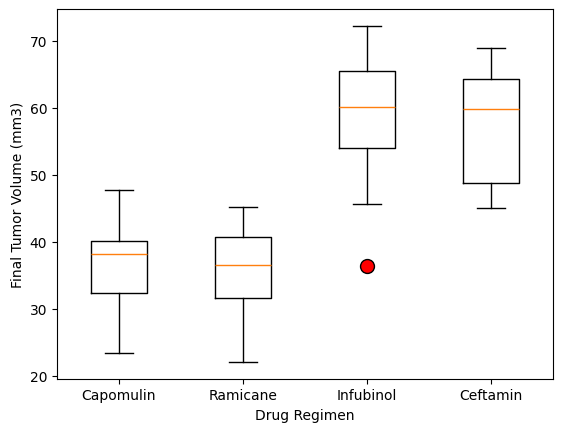

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
dot = dict(marker = "o",markersize=10, markerfacecolor = "red")
ax1.boxplot(tumor_vol, labels=treatment, flierprops=dot)
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

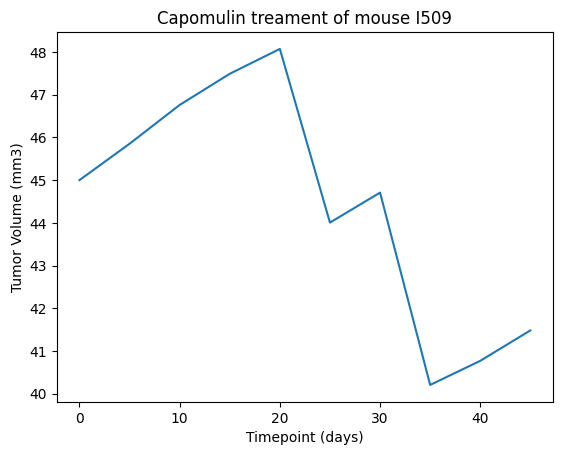

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
capomulin_line

timepoint = capomulin_line["Timepoint"]
tumor_volume = capomulin_line["Tumor Volume (mm3)"]

line, = plt.plot(timepoint, tumor_volume, linewidth=1.5, markersize=10)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treament of mouse I509')
plt.show()

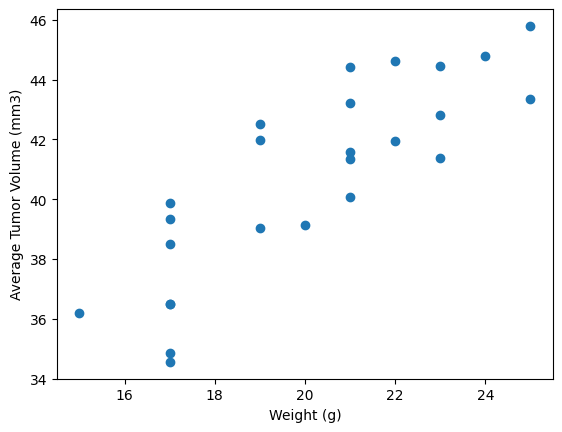

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_scatter = clean_df[clean_df['Drug Regimen'].isin(['Capomulin'])]

mouse_weight = capomulin_scatter.groupby('Mouse ID')['Weight (g)'].mean()
tum_volume = capomulin_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(mouse_weight, tum_volume, marker='o', alpha=1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


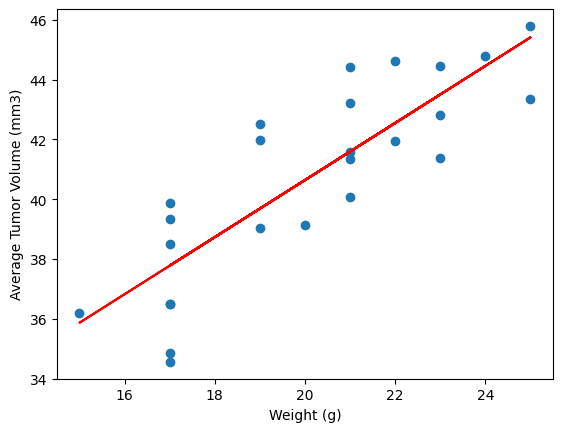

In [18]:
# Calculate the correlation coefficient and a linear regression model
capomulin_scatter = clean_df[clean_df['Drug Regimen'].isin(['Capomulin'])]

mouse_weight = capomulin_scatter.groupby('Mouse ID')['Weight (g)'].mean()
tum_volume = capomulin_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

correlation = st.pearsonr(mouse_weight, tum_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
linregress = st.linregress(mouse_weight, tum_volume)
(slope, intercept, rvalue, pvalue, stderr) = linregress
values = mouse_weight * slope + intercept

plt.scatter(mouse_weight,tum_volume, marker='o', alpha=1)
plt.plot(mouse_weight,values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

